# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [2]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 8
n_out = 10

# Nb de 'training examples'
m = 300

In [223]:
alpha = 0.5  # Learning rate
epochs = 280 # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [103]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.power(np.tanh(x), 2)


## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [104]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []    
    for epoch in range(epochs):
        # Forward
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        # Backward
        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
        # Parameter update (use the learning rate alpha here!)
        W1 = W1 - (alpha * dW1)
        W2 = W2 - (alpha * dW2)
        b1 = b1 - (alpha * db1)
        b2 = b2 - (alpha * db2)
        # Compute loss
        L = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
        loss = - np.sum(L) / m
        #loss = - (np.dot(Y, np.log(A2)) + np.dot((1 - Y), np.log(1 - A2))) / m
        loss_history.append(loss)
        print("Epoch %d, Loss: %.8f" % (epoch, loss))
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [228]:
W1 = np.random.randn(n_hidden, n_in) * 0.01
W2 = np.random.randn(n_out, n_hidden) * 0.01
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))
W2.shape

(10, 8)

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [229]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
Y = X ^ 1
print(X)
print(Y)

[[1 0 1 ..., 0 1 1]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 1 1 0]
 [0 1 1 ..., 0 0 0]
 [0 1 0 ..., 1 1 1]]
[[0 1 0 ..., 1 0 0]
 [0 0 1 ..., 1 1 1]
 [0 1 1 ..., 1 1 1]
 ..., 
 [0 1 1 ..., 0 0 1]
 [1 0 0 ..., 1 1 1]
 [1 0 1 ..., 0 0 0]]


## Lancer l'entraînement du réseau

In [230]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

Epoch 0, Loss: 6.93109187
Epoch 1, Loss: 6.92819439
Epoch 2, Loss: 6.92580893
Epoch 3, Loss: 6.92376792
Epoch 4, Loss: 6.92192986
Epoch 5, Loss: 6.92016930
Epoch 6, Loss: 6.91836808
Epoch 7, Loss: 6.91640727
Epoch 8, Loss: 6.91415932
Epoch 9, Loss: 6.91147993
Epoch 10, Loss: 6.90819924
Epoch 11, Loss: 6.90411199
Epoch 12, Loss: 6.89896632
Epoch 13, Loss: 6.89245130
Epoch 14, Loss: 6.88418310
Epoch 15, Loss: 6.87369070
Epoch 16, Loss: 6.86040227
Epoch 17, Loss: 6.84363482
Epoch 18, Loss: 6.82259085
Epoch 19, Loss: 6.79636733
Epoch 20, Loss: 6.76398387
Epoch 21, Loss: 6.72443693
Epoch 22, Loss: 6.67678363
Epoch 23, Loss: 6.62025160
Epoch 24, Loss: 6.55435806
Epoch 25, Loss: 6.47900884
Epoch 26, Loss: 6.39454239
Epoch 27, Loss: 6.30169514
Epoch 28, Loss: 6.20149120
Epoch 29, Loss: 6.09509097
Epoch 30, Loss: 5.98365113
Epoch 31, Loss: 5.86823921
Epoch 32, Loss: 5.74981466
Epoch 33, Loss: 5.62925640
Epoch 34, Loss: 5.50740252
Epoch 35, Loss: 5.38507426
Epoch 36, Loss: 5.26307371
Epoch 37, L

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

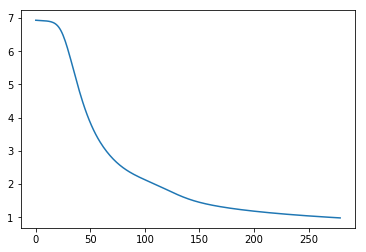

In [231]:
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(loss_history)

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [186]:
def predict(X, W1, W2, b1, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return np.array([0 if y < 0.5 else 1 for y in A2])

### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [232]:
X = np.random.binomial(1, 0.5, (n_in,1))
print("X  =", X.T)
print("Y  =", (X ^ 1).T)
print("Y^ = ", predict(X, W1, W2, b1, b2).T)

X  = [[1 0 1 0 1 0 1 1 0 1]]
Y  = [[0 1 0 1 0 1 0 0 1 0]]
Y^ =  [0 1 0 1 0 1 0 0 1 0]


### Tester la performance sur une série d'exemples

In [240]:
from sklearn.metrics import roc_auc_score
val_list = list()
for i in range (100) :
    X = np.random.binomial(1, 0.5, (n_in, 1))
    Y = X ^ 1
    val_list.append(roc_auc_score(Y, predict(X, W1, W2, b1, b2)))
    
print(val_list)
print(np.mean(val_list))

[1.0, 1.0, 0.91666666666666674, 0.8125, 1.0, 1.0, 0.9375, 0.91666666666666674, 0.9375, 1.0, 1.0, 0.9285714285714286, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.90000000000000002, 0.90000000000000002, 0.91666666666666674, 1.0, 1.0, 0.70833333333333337, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.83333333333333337, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91666666666666674, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.94444444444444442, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.90000000000000002, 0.9285714285714286, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 0.9375, 0.83333333333333337, 1.0, 1.0, 1.0, 1.0, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 0.7857142857142857, 1.0, 1.0, 0.85714285714285721]
0.968021825397
